# Principal Component Analysis example (with mnist dataset)

In [19]:
# As always, data manipulation
import numpy as np
import pandas as pd

# Some data preprocessing:
from sklearn.preprocessing import MinMaxScaler # Values between 0 and 1
from sklearn.decomposition import PCA # Reduction of dimensionality

# Model implementation
from sklearn.naive_bayes import GaussianNB

# Model metrics: 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

# Obtain the Dataset
from sklearn.datasets import fetch_openml

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D # 3D visualization

# Use PIL to read images
from PIL import Image

In [2]:
# Magic command for interaction with graphs
%matplotlib notebook

In [3]:
# We will use the MNIST dataset (the one that was used in the Naive Bayes!)
mnist = fetch_openml("mnist_784", version=1)

In [4]:
# Define the expliactive attributes on x and the predicted target on y
x, y = mnist["data"], mnist["target"]
x.shape,y.shape

((70000, 784), (70000,))

In [5]:
# Since PCA is affected by scale we will preprocess our data, making it unitary
scaler = MinMaxScaler() # MinMaxScaler:
scaler.fit(x)

# Transform x values into the min=0, max=1 values
transformed_x = scaler.transform(x)

In [6]:
# Print the shape of the explicative attributes
transformed_x.shape

(70000, 784)

In [7]:
# Select a random number from 70000 different values to plot
random_number = np.random.randint(0,transformed_x.shape[0]-1)
random_digit = transformed_x[random_number] # in the dataset select that position
random_name = y[random_number] # in the tarjet set, select that same position

# Create a figure to plot
plt.figure(figsize=(4,4))

# Plot the number!
plt.subplot(121)
# Reshape the digit into a 28x28 image
plt.imshow(random_digit.reshape(28,28), cmap='gray', aspect='equal')
plt.xticks([]) # Remove x-axis
plt.yticks([]) # Remove y-axis
plt.title(f"Number {random_name}") # Write the title with the number

# Plot the vector!
plt.subplot(122)
# Number is actually a vector
sns.heatmap(random_digit.reshape(-1,1), cmap="gray")
plt.title(f"Vectorized number {random_name} ") # Title

# Order the values 
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

In [8]:
# Lets analyze how the tarjet variable is distributed:
y_data_counts = pd.Series(y).value_counts()
plt.figure()
plt.title("Frecuency of the tarjet variable")
plt.bar(x=y_data_counts.index,height=y_data_counts)
plt.show()

# It seems the data is balanced!

<IPython.core.display.Javascript object>

# Principal Component Analysis

In [9]:
# Reduction to a certain number of dimensions (instead of 784)
pca_reduction = {}
# We will reduce the dimensions to these numbers
numbers =(2,10,50)

# Data will be saved into a dictionarry
for numb in numbers:
    # Create the PCA model
    pca_reduction[str(numb)] = {"model":PCA(n_components=numb)}
    
    # Fit our transformed data into the wanted dimensionality (like a training set)
    pca_reduction[str(numb)]["model"].fit(transformed_x)
    
    # Transform the data into the now new lower dimension
    pca_reduction[str(numb)]["transformed_data"] = pca_reduction[str(numb)]["model"].transform(transformed_x)
    
    # Obtain the shape of this transformed data
    pca_reduction[str(numb)]["transformed_data_shape"] = pca_reduction[str(numb)]["transformed_data"].shape
    
    # We can always go back to the original data trough an inverse_transform (information will be lost due to less dimensions!)
    pca_reduction[str(numb)]["approximation"] = pca_reduction[str(numb)]["model"].inverse_transform(
        pca_reduction[str(numb)]["transformed_data"])
    
    # See that the returned shape is the same as the original data
    pca_reduction[str(numb)]["approximation_shape"] = pca_reduction[str(numb)]["approximation"].shape

In [10]:
# Show what the dictionary contains for the PCA maintaining only 2 elements.
pca_reduction["2"]

{'model': PCA(n_components=2),
 'transformed_data': array([[ 0.47943466, -1.24013728],
        [ 3.96272239, -1.13710533],
        [-0.23135684,  1.5439144 ],
        ...,
        [-1.06473303,  2.31402978],
        [-1.21657078, -0.45776186],
        [ 4.15240166, -0.32702637]]),
 'transformed_data_shape': (70000, 2),
 'approximation': array([[ 1.77702714e-17,  4.44127244e-17,  1.56814286e-17, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-2.01107752e-17, -7.66249629e-18, -2.16512204e-17, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-2.59000989e-17, -6.03117142e-17, -2.32606943e-17, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [-3.14003711e-17, -8.05352072e-17, -2.75208041e-17, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 2.09589618e-17,  3.55321373e-17,  2.00396536e-17, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-3.6914653

As said before, we can always find our original data after the PCA transformation by doing the inverse operation.
However, since in PCA, we change the dimensionality, information is somehow lost!

<IPython.core.display.Javascript object>


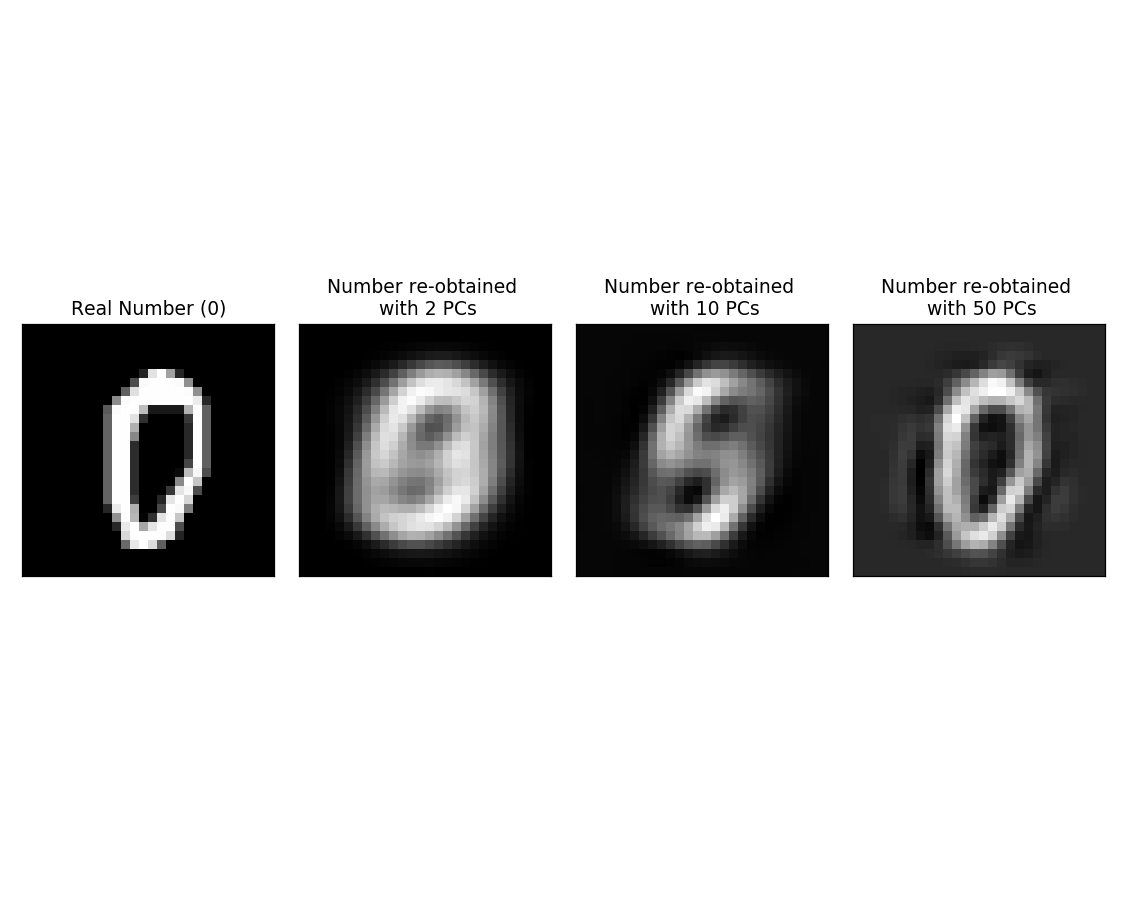

In [11]:
# Retrieve the data of the approximation to compare it with the real data:
plt.figure(figsize=(10,8))

# Select any random number from the data:
random_number = np.random.randint(0,transformed_x.shape[0]-1)

# Our real digit will be the ones of the original data
real_digit = transformed_x[random_number]

# We plot that data into the first image
plt.subplot(1,len(numbers)+1,1)
plt.imshow(real_digit.reshape(28,28), cmap="gray", aspect='equal')
plt.xticks([]) # Remove Axis
plt.yticks([]) 
plt.title(f"Real Number ({y[random_number]})")

# We now plot every retrieved image from the reduction
for i,numb in enumerate(numbers):
    
    # Use the saved data in the dictionary
    approximation = pca_reduction[str(numb)]["approximation"]
    
    # Select a random number in the dataset
    random_digit_approx = approximation[random_number]    

    plt.subplot(1,len(numbers)+1,i+2)
    # Reshape the random value
    plt.imshow(random_digit_approx.reshape(28,28), cmap='gray', aspect='equal')
    plt.xticks([]) # Remove Axis
    plt.yticks([]) 
    plt.title(f"Number re-obtained \n with {numb} PCs")

plt.tight_layout()
plt.show()

# Data visualization!

In [12]:
# Two dimensional visualizaiton from the reduction of the 784 dimension of numbers
PCA_2 = pd.DataFrame(pca_reduction["2"]['transformed_data'], columns =["PC1","PC2"]) # Generate Dataframe
PCA_2['tarjet'] = y.astype("int") # include the tarjet variable into the set
PCA_2.head()

,PC1,PC2,tarjet
0,0.479435,-1.240137,5
1,3.962722,-1.137105,0
2,-0.231357,1.543914,4
3,-3.125354,-2.382042,1
4,-1.534584,2.861978,9


<IPython.core.display.Javascript object>


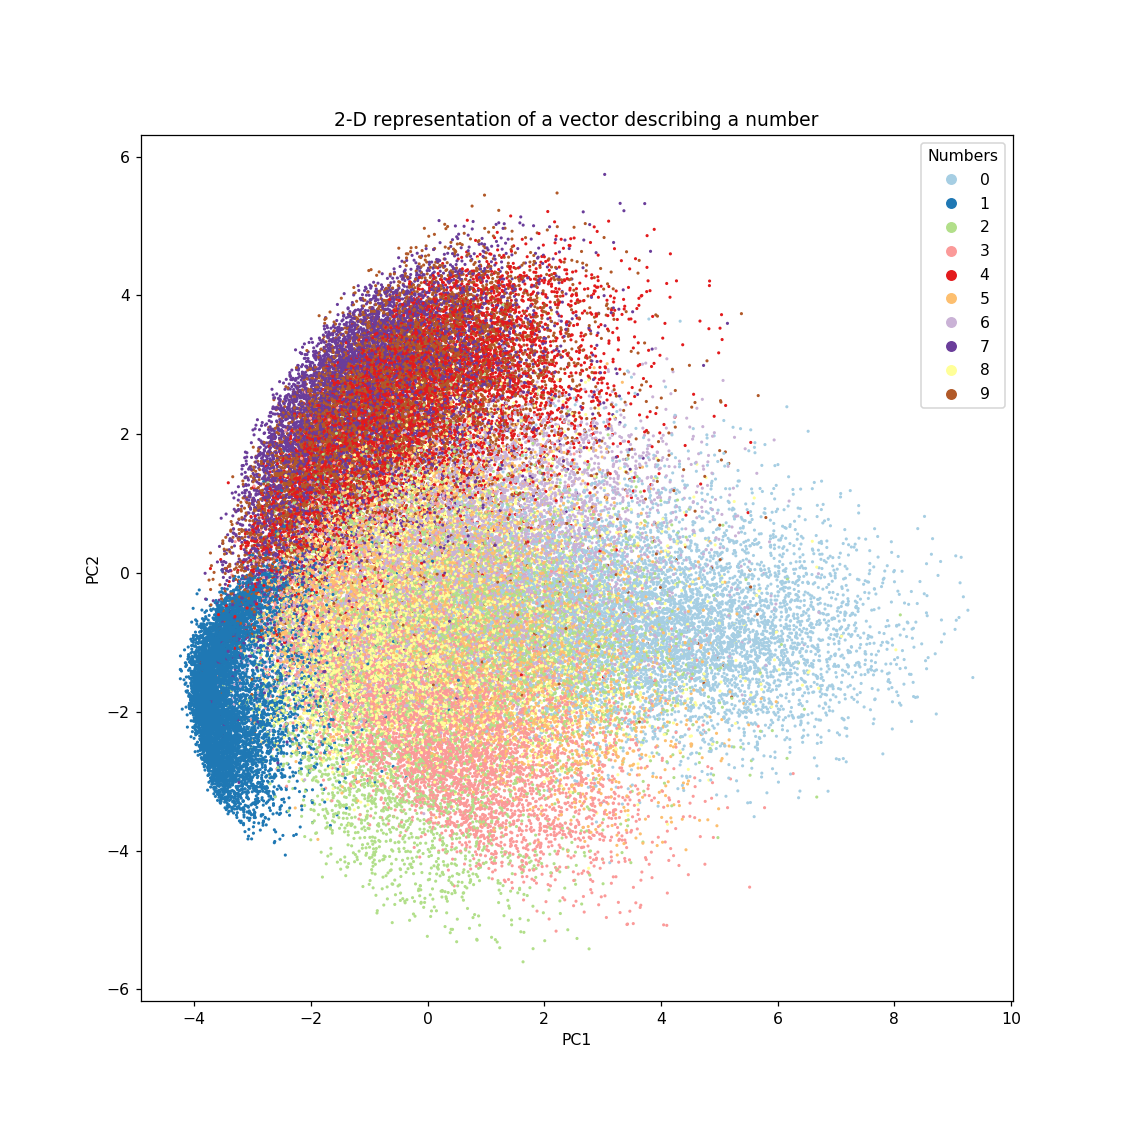

In [13]:
# Plot the figure
plt.figure(figsize=(10,10))
# Scatter plot with the components and colors for each number
scatter = plt.scatter(x=PCA_2.PC1,y=PCA_2.PC2, c=PCA_2.tarjet, s=1, cmap="Paired")

# Write title, legends and labels
plt.title("2-D representation of a vector describing a number")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(*scatter.legend_elements(),loc="upper right", title="Numbers")
plt.show()

In [14]:
# Using now 10 PCs, we can obtain probably better results
PCA_10 = pd.DataFrame(pca_reduction["10"]['transformed_data'], columns =[f"PC{i+1}" for i in range(10)])
PCA_10['tarjet'] = y.astype("int")
PCA_10

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,tarjet
0,0.479432,-1.240133,-0.200517,-2.183912,-0.192983,-0.851256,0.916500,0.740487,-1.406899,0.798599,5
1,3.962722,-1.137112,2.259297,-1.902287,-3.299912,-0.570454,-0.189582,-0.400866,0.136465,0.594988,0
2,-0.231357,1.543912,-0.635287,2.075374,-1.228078,0.035175,-3.376362,1.467738,-0.308197,-0.757473,4
3,-3.125353,-2.382044,1.158913,0.427894,0.100650,2.736703,-1.860831,-0.391362,1.171045,0.019086,1
4,-1.534584,2.861977,0.054537,-0.952527,0.387342,0.140888,-0.342964,-1.630623,0.785249,0.417514,9
...,...,...,...,...,...,...,...,...,...,...,...
69995,1.198800,-2.155471,-0.087556,1.089978,3.328254,3.629440,3.067324,1.082607,-2.142286,-0.113745,2
69996,2.232102,-2.741283,-3.271962,-0.623486,0.369773,-0.750802,2.637872,3.074861,-0.190231,-0.149278,3
69997,-1.064733,2.314033,1.338701,-1.705861,2.641759,0.547790,-0.153342,-1.352043,-0.204716,-3.152326,4
69998,-1.216569,-0.457753,2.493023,-1.107878,-0.608877,-1.082034,0.607171,0.568044,1.117896,-0.804039,5


<IPython.core.display.Javascript object>


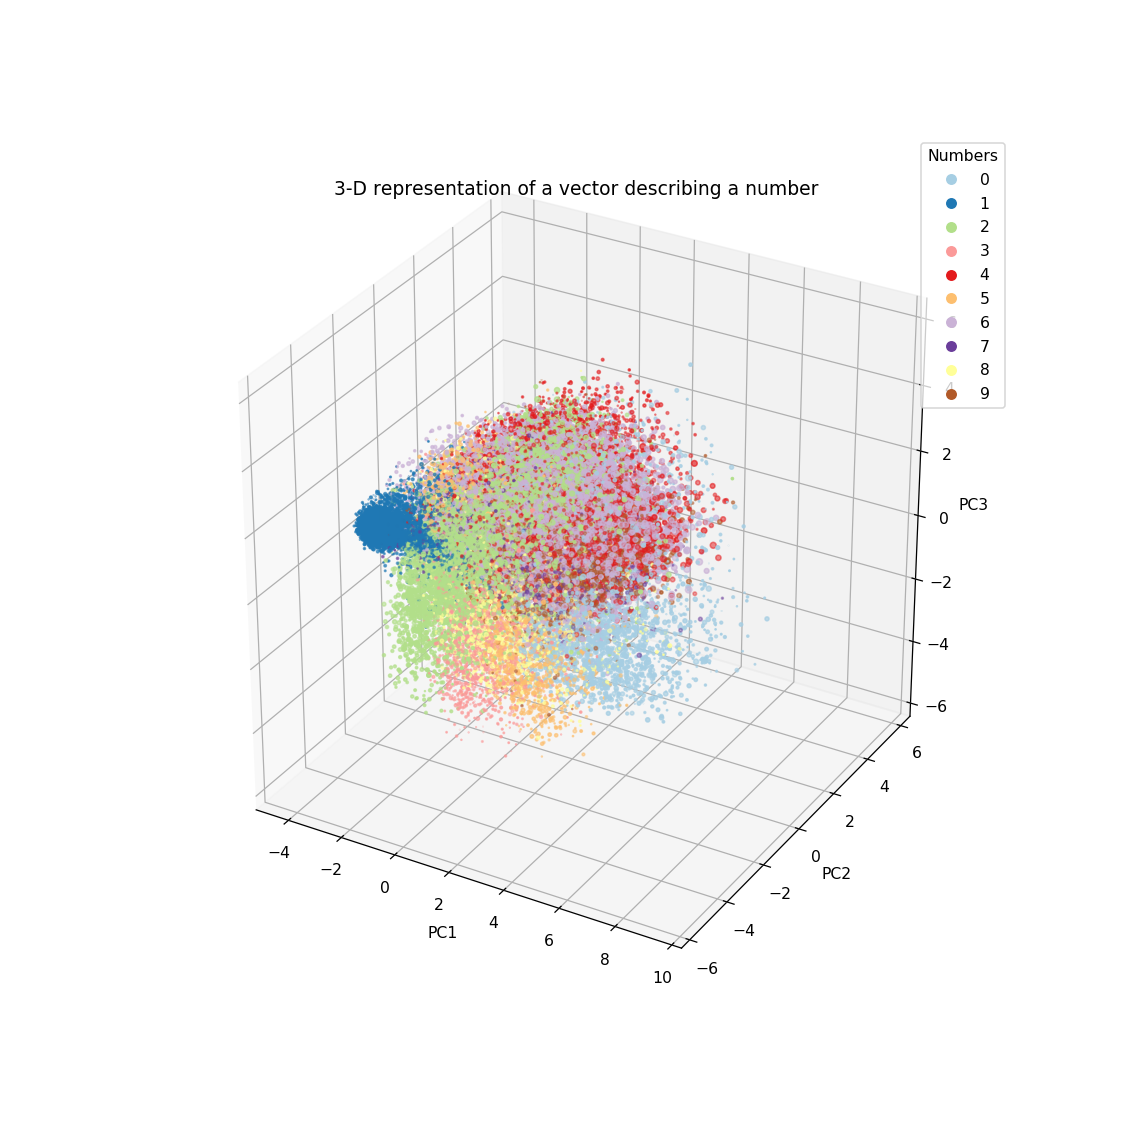

/home/dhdzmota/.local/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


In [15]:
# Data 3D Visualization (using only 3 dimensions from the 10PCA case)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d') # Necessary for plotting in 3D

# Plot the 3 principal components
scatter = ax.scatter(xs=PCA_10.PC1,ys=PCA_10.PC2, zs=PCA_10.PC3, c=PCA_10.tarjet, s=3*PCA_10.PC4, cmap="Paired")

plt.title("3-D representation of a vector describing a number")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.legend(*scatter.legend_elements(),loc="upper right", title="Numbers")

# Training a Model!

In [16]:
# Split the data in train and test sets

# We will use the 10Dimensional case (instead of the 784)

x = PCA_10.drop('tarjet',axis=1)
y = PCA_10["tarjet"]
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [17]:
# Generate an instance of the Naive Bayes method: GaussianNB()
gnb = GaussianNB()

# Train with the data
gnb.fit(x_train, y_train)

# Obtain some predictions
y_pred = gnb.predict(x_test)

NameError: name 'GaussianNB' is not defined

Since the data is well balanced, accuracy and a confusion matrix and the respective metrics are more than enough to understand the performance of the model!

In [ ]:
# Obtain the accuracy
print(f"Number of mislabeled images out of a total {x_test.shape[0]} images : {(y_test != y_pred).sum()}")
print(f"This yields an accuracy of: {accuracy_score(y_test, y_pred)}")

In [ ]:
# Generate the confusion matrix
confu = confusion_matrix(y_test, y_pred)

# Plot the figure as a heatmap with annotations
plt.figure( figsize=(10,10))
sns.heatmap(confu,cmap=plt.cm.gray, annot=True, square=True, linewidths=.1)
plt.title("Confusion Matrix")
plt.ylabel("Real values")
plt.xlabel("Predicted values")
plt.show()

In [ ]:
# Write a classification report of the variables:

# As a dataframe (:
pd.DataFrame([list(filter(lambda x: x!='',classification_report(y_test, y_pred).split("\n")[2:12][i].split(" ")))[1:]
              for i in range(10)],
             columns = list(filter(lambda x: x!='',classification_report(y_test, y_pred).split("\n")[0].split())))

In [ ]:
# Save the model with joblib
joblib.dump(gnb,"number_classification_naive_bayes.joblib")

# After everything, we can now use our model with real data!
(I did some images in paint and put them in the folder numbers)

In [ ]:
# Save the images in this list
trial_list = []

# Create a figure to plot
plt.figure(figsize=(10,3))

# The names of the image are the digits themselves!
for i in range(11):
    # Open each images (28x28x3)px
    image=Image.open(f"./Numbers/{i}.png")
    
    # Obtain the data as a numpy arra
    data=np.asarray(image)[:,:,0] # Select only one of the rgb colors (corresponding to the 3 pixels)
    # Flatten the image to obtain a vector of 784 elements
    im = data.flatten()
    # Add that vector into the trial list
    trial_list.append(im)

    # See which number we are evaluating
    plt.subplot(1,11,i+1)
    # Reshape the digit into a 28x28 image
    plt.imshow(im.reshape(28,28), cmap='gray', aspect='equal')
    
    plt.xticks([]) # Remove x-axis
    plt.yticks([]) # Remove y-axis
    plt.title(f"{i}") # Write the title with the number


# Order the values 
plt.suptitle("Real Examples of numbers")
plt.tight_layout()

plt.show()

We have the list of vectors now, we can feed them to our model now, but remember, first we scaled them with MinMax, and then we did PCA, after that we can now predict!

In [ ]:
# Always work with numpy arrays
trial_list_np = np.array(trial_list)

# Scale the data with MinMax
processed_data = scaler.transform(trial_list_np)

# Make the reduction of dimeinsions with PCA (make sure the model we are using is the one with the corresponging PCs)
trial_processed_data = pca_reduction["10"]["model"].transform(processed_data)

# Make the predictions!
model = joblib.load("number_classification_naive_bayes.joblib")
answers = model.predict(trial_processed_data)

In [ ]:
# Create a figure to plot
plt.figure(figsize=(10,3))

# The names of the image are the digits themselves!
for i,val in enumerate(answers):
    # Open each images (28x28x3)px

    # See which number we are evaluating
    plt.subplot(1,11,i+1)
    # Reshape the digit into a 28x28 image
    plt.imshow(processed_data[i].reshape(28,28), cmap='gray', aspect='equal')
    
    plt.xticks([]) # Remove x-axis
    plt.yticks([]) # Remove y-axis
    if i==val:
        color='green'
    else:
        color='red'
    
    plt.title(f"{val}", color=color) # Write the title with the number


# Order the values 
plt.tight_layout()
plt.show()